## Task 01, 02 Actual Audio extract from given video URL

In [66]:
# import os
# import subprocess
# import shutil
# import requests
# from urllib.parse import urlparse
# import yt_dlp


# def is_url(path):
#     return path.startswith("http://") or path.startswith("https://")


# def is_youtube_url(url):
#     return "youtube.com" in url or "youtu.be" in url


# def download_video_youtube(youtube_url, output_path="yt_video.mp4"):
#     print("[~] Detected YouTube URL. Downloading with yt-dlp...")
#     ydl_opts = {
#         'format': 'mp4',
#         'outtmpl': output_path,
#         'quiet': False,
#         'noplaylist': True,
#     }

#     with yt_dlp.YoutubeDL(ydl_opts) as ydl:
#         ydl.download([youtube_url])

#     print(f"[✓] Downloaded YouTube video to {output_path}")
#     return output_path


# def download_video_http(video_url, output_path="http_video.mp4"):
#     print("[~] Detected direct video URL. Downloading with requests...")
#     response = requests.get(video_url, stream=True)
#     if response.status_code != 200:
#         raise Exception("Failed to download video")

#     with open(output_path, "wb") as f:
#         for chunk in response.iter_content(chunk_size=1024 * 1024):
#             f.write(chunk)
#     print(f"[✓] Downloaded video to {output_path}")
#     return output_path


# def extract_audio(video_path, audio_path="extracted_audio.wav", max_duration=None):
#     if not shutil.which("ffmpeg"):
#         raise EnvironmentError("ffmpeg not found. Please install it.")

#     command = [
#         "ffmpeg", "-y", "-i", video_path,
#         "-vn", "-acodec", "pcm_s16le",
#         "-ar", "16000", "-ac", "1"
#     ]

#     if max_duration:
#         command.extend(["-t", str(max_duration)])

#     command.append(audio_path)

#     print(f"[~] Extracting audio from: {video_path}")
#     subprocess.run(command, check=True)
#     print(f"[✓] Extracted audio to {audio_path}")
#     return audio_path


# def handle_video_input(input_path_or_url, audio_output="extracted_audio.wav", max_duration=None):
#     if is_url(input_path_or_url):
#         if is_youtube_url(input_path_or_url):
#             video_path = download_video_youtube(input_path_or_url)
#         else:
#             video_path = download_video_http(input_path_or_url)
#     else:
#         print("[~] Detected local video file.")
#         if not os.path.isfile(input_path_or_url):
#             raise FileNotFoundError(f"File not found: {input_path_or_url}")
#         video_path = input_path_or_url

#     return extract_audio(video_path, audio_output, max_duration=max_duration)


In [72]:
import os
import subprocess
import shutil
import requests
import hashlib
from urllib.parse import urlparse
import yt_dlp


def is_url(path):
    return path.startswith("http://") or path.startswith("https://")


def is_youtube_url(url):
    return "youtube.com" in url or "youtu.be" in url


def remove_if_exists(filepath):
    if os.path.exists(filepath):
        os.remove(filepath)


def get_filename_from_url(url, prefix, ext):
    url_hash = hashlib.md5(url.encode()).hexdigest()
    return f"{prefix}_{url_hash}.{ext}"


def download_video_youtube(youtube_url, output_path=None):
    if output_path is None:
        output_path = get_filename_from_url(youtube_url, "yt_video", "mp4")

    remove_if_exists(output_path)
    print("[~] Detected YouTube URL. Downloading with yt-dlp...")
    ydl_opts = {
        'format': 'mp4',
        'outtmpl': output_path,
        'quiet': False,
        'noplaylist': True,
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([youtube_url])

    print(f"[✓] Downloaded YouTube video to {output_path}")
    return output_path


def download_video_http(video_url, output_path=None):
    if output_path is None:
        output_path = get_filename_from_url(video_url, "http_video", "mp4")

    remove_if_exists(output_path)
    print("[~] Detected direct video URL. Downloading with requests...")
    response = requests.get(video_url, stream=True)
    if response.status_code != 200:
        raise Exception("Failed to download video")

    with open(output_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024 * 1024):
            f.write(chunk)
    print(f"[✓] Downloaded video to {output_path}")
    return output_path


def extract_audio(video_path, audio_path="extracted_audio.wav", max_duration=None):
    remove_if_exists(audio_path)
    if not shutil.which("ffmpeg"):
        raise EnvironmentError("ffmpeg not found. Please install it.")

    command = [
        "ffmpeg", "-y", "-i", video_path,
        "-vn", "-acodec", "pcm_s16le",
        "-ar", "16000", "-ac", "1"
    ]

    if max_duration:
        command.extend(["-t", str(max_duration)])

    command.append(audio_path)

    print(f"[~] Extracting audio from: {video_path}")
    subprocess.run(command, check=True)
    print(f"[✓] Extracted audio to {audio_path}")
    return audio_path


def handle_video_input(input_path_or_url, audio_output="extracted_audio.wav", max_duration=None):
    if is_url(input_path_or_url):
        if is_youtube_url(input_path_or_url):
            video_path = download_video_youtube(input_path_or_url)
        else:
            video_path = download_video_http(input_path_or_url)
    else:
        print("[~] Detected local video file.")
        if not os.path.isfile(input_path_or_url):
            raise FileNotFoundError(f"File not found: {input_path_or_url}")
        video_path = input_path_or_url

    return extract_audio(video_path, audio_output, max_duration=max_duration)


In [59]:
# Example 01: youtube video

handle_video_input("https://youtu.be/nIwU-9ZTTJc?si=Ba6XvQSEv8nwEBGH")
# handle_video_input("https://youtu.be/0Yyu2VgTLro?si=Ohg3zrd6-_ZPj-Au") #Indian accent



[~] Detected YouTube URL. Downloading with yt-dlp...
[youtube] Extracting URL: https://youtu.be/nIwU-9ZTTJc?si=Ba6XvQSEv8nwEBGH
[youtube] nIwU-9ZTTJc: Downloading webpage
[youtube] nIwU-9ZTTJc: Downloading tv client config
[youtube] nIwU-9ZTTJc: Downloading tv player API JSON
[youtube] nIwU-9ZTTJc: Downloading ios player API JSON
[youtube] nIwU-9ZTTJc: Downloading m3u8 information
[info] nIwU-9ZTTJc: Downloading 1 format(s): 18
[download] Destination: yt_video_42c804a5d0593744b8ef0b63eefad16e.mp4
[download] 100% of   11.11MiB in 00:00:04 at 2.57MiB/s     
[✓] Downloaded YouTube video to yt_video_42c804a5d0593744b8ef0b63eefad16e.mp4
[~] Extracting audio from: yt_video_42c804a5d0593744b8ef0b63eefad16e.mp4
[✓] Extracted audio to extracted_audio.wav


'extracted_audio.wav'

In [ ]:
# Example 02: Public video url (us accent)
handle_video_input("https://archive.org/download/learnenglishconversationwithfilm/English%20Conversation%2049.mp4"
)


[~] Detected direct video URL. Downloading with requests...
[✓] Downloaded video to http_video.mp4
[~] Extracting audio from: http_video.mp4
[✓] Extracted audio to extracted_audio.wav


'extracted_audio.wav'

In [73]:
# Example 03: local file url
# handle_video_input(r"C:\Users\giree\Downloads\YouCut_20250525_190439329.mp4")
handle_video_input(r"C:\Users\giree\Downloads\WhatsApp Video 2025-06-01 at 04.16.31.mp4")

[~] Detected local video file.
[~] Extracting audio from: C:\Users\giree\Downloads\WhatsApp Video 2025-06-01 at 04.16.31.mp4
[✓] Extracted audio to extracted_audio.wav


'extracted_audio.wav'

In [74]:
# handle_video_input("https://www.loom.com/share/eb3eef2268d64d9cbae5c655bbd1de8d?sid=e27a5e5f-1c5f-48e7-bfc1-e08e8e13ed0a")

## Task 03

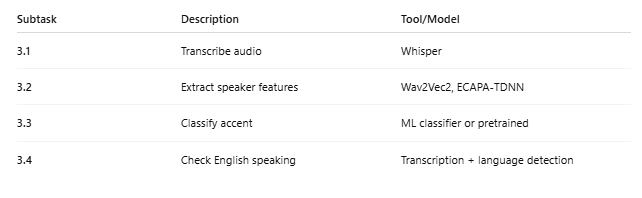

In [ ]:
## Because Whisper is not published to PyPI (the standard Python package index), Clone the Whisper source code directly from GitHub
pip install git+https://github.com/openai/whisper.git

In [ ]:
pip install torch

### 3.1 Transcribe the Audio (Speech-to-Text)

Even though the goal is accent detection, transcription gives us:

A clean signal of voice segments

Potential auxiliary information like pronunciation artifacts

Tool:

OpenAI Whisper (open-source & multilingual, includes basic accent info implicitly)

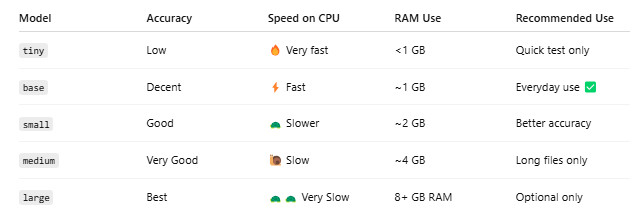

In [75]:
import whisper

# Force Whisper to use the CPU
model = whisper.load_model("base", device="cpu")

# Run transcription
result = model.transcribe("extracted_audio.wav")

# Print output
print("Transcription:\n")
print(result["text"])


c:\Users\giree\anaconda3\envs\video\lib\site-packages\whisper\transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription:

 Hi everyone, I have done with my task yesterday, so I am recording a video. In this video I want to explain you what improvements I have made in this task and also I want to explain why those changes are made and how performance actually increased. So coming to my model, like coming to my code I have submitted you two quotes, like one with like improving the baseline model and other one I have built a new model, new models like so I have written our readme file explaining everything in detail. So first model, like I have updated a baseline model, if you go through the baseline model, it's like simple neural network model without much of optimization if you see that loss curves are like going again upwards which means overfitting. So I had made a couple of changes in this model, so I have added optional hyper parameter tuning, so which actually tunes hyper parameters like number of dropout like dropout rate and auto, automatically it will just with a different set of va

In [76]:
with open("transcription.txt", "w") as f:
    f.write(result["text"])

### 3.2 — Extract Speaker Voice Features for Accent Detection

🎯 Objective:
Get a numerical representation (embedding) of the speaker’s voice from the audio, which we’ll use to classify their accent.

✅ Why speaker embeddings?
They capture voice characteristics like accent, pitch, style.
We can train or apply a classifier on these embeddings to predict accent.

🧠 How to do this:
Use a pretrained speaker embedding model (sometimes called speaker verification or speaker recognition model).

In [ ]:
pip install speechbrain

speechbrain (or huggingface_hub) downloads model files and tries to create symlinks inside your cache or model folder.On Windows, creating symlinks requires elevated privileges (admin rights) or Developer Mode enabled. IF NOT ENABLED YOU WILL ENCOUNTER OS ERRO.

To avoid ""OSError: [WinError 1314] A required privilege is not held by the client"" TRY FOLLOWING FIX.

FIX: *Enable Dev Mode*	
Windows Settings → System → For developers → Enable Dev Mode


In [77]:
import torchaudio
from speechbrain.pretrained import SpeakerRecognition

# Load pre-trained ECAPA-TDNN model
model = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="models/spkrec-ecapa-voxceleb")

# Load audio (must be 16 kHz mono)
signal, fs = torchaudio.load("extracted_audio.wav")
if fs != 16000:
    resampler = torchaudio.transforms.Resample(fs, 16000)
    signal = resampler(signal)

# Get speaker embedding vector (1D tensor)
embedding = model.encode_batch(signal)

print("Speaker embedding shape:", embedding.shape)


c:\Users\giree\anaconda3\envs\video\lib\site-packages\speechbrain\utils\parameter_transfer.py:234: UserWarning: Requested Pretrainer collection using symlinks on Windows. This might not work; see `LocalStrategy` documentation. Consider unsetting `collect_in` in Pretrainer to avoid symlinking altogether.
  warnings.warn(


Speaker embedding shape: torch.Size([1, 1, 192])


Shape [1, 1, 192] means:

Batch size = 1

Number of speaker embeddings = 1

Embedding dimension = 192

We now have a numeric vector representing the speaker’s voice

In [78]:
# Flatten or squeeze the embedding to [192] for easier use:
embedding_vector = embedding.squeeze().cpu().numpy()
print(embedding_vector.shape)  # (192,)

(192,)


🔍 Pretrained Model
Model Name: Jzuluaga/accent-id-commonaccent_ecapa

Framework: SpeechBrain

Supported Accents: US, England, Australia, Indian, Canada, Bermuda, Scotland, African, Ireland, New Zealand, Wales, Malaysia, Philippines, Singapore, Hong Kong, South Atlantic

Accuracy: Up to 87% on test sets 

In [10]:
pip install speechbrain torchaudio

Note: you may need to restart the kernel to use updated packages.


In [79]:
from speechbrain.pretrained import EncoderClassifier

# Correct source path
classifier = EncoderClassifier.from_hparams(
    source="Jzuluaga/accent-id-commonaccent_ecapa",
    savedir="pretrained_models/accent_id"
)


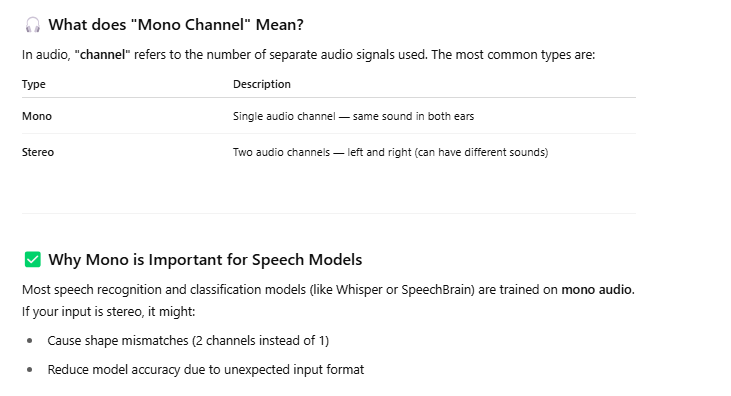

In [ ]:
import torchaudio
from speechbrain.pretrained import EncoderClassifier

# ---------- Function 1: Preprocess Audio ----------
def preprocess_audio(input_path: str, output_path: str = "processed_audio.wav"):
    """
    Converts audio to mono and 16 kHz sample rate.
    Saves the processed audio to output_path.
    """
    signal, sample_rate = torchaudio.load(input_path)

    # Convert stereo to mono if needed
    if signal.shape[0] > 1:
        signal = signal.mean(dim=0, keepdim=True)

    # Resample if needed
    if sample_rate != 16000:
        resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
        signal = resampler(signal)

    # Save the processed audio
    torchaudio.save(output_path, signal, 16000)
    return output_path


# ---------- Function 2: Classify Accent ----------
def classify_accent(audio_path: str):
    """
    Runs accent classification on a given mono 16 kHz WAV file.
    Returns the predicted accent and confidence.
    """
    # Load classifier model
    classifier = EncoderClassifier.from_hparams(
        source="Jzuluaga/accent-id-commonaccent_ecapa",
        savedir="pretrained_models/accent_id"
    )

    
    # Predict accent
    prediction = classifier.classify_file(audio_path)
    predicted_label = prediction[3][0]  # first label as string
    predicted_index = prediction[2][0].item()  # predicted class index

    # Get confidence score for predicted class from prediction[0]
    confidence_score = prediction[0][0][predicted_index].item() * 100  # as percentage

    return predicted_label, predicted_index, confidence_score, prediction


# Step 1: Preprocess
processed_path = preprocess_audio("extracted_audio.wav")

# Step 2: Classify
accent, index, confidence, full_pred = classify_accent(processed_path)

# Print results
print(f"Predicted Accent: {accent}")
print(f"Predicted Index: {index}")
print(f"Confidence Score: {confidence:.2f}%")
print(f"Full Prediction Output: {full_pred}")

🎧 What Happens If the Audio Has Multiple Speakers?
When an audio file contains multiple speakers, but you feed it as a single input to a model like the ECAPA-based accent classifier, here’s what typically happens:

🔍 Behavior of the Current Classifier:
It treats the entire audio clip as if it's from one speaker.

It extracts a single embedding vector from the whole waveform.

It then predicts a single accent label based on the aggregate voice features.

⚠️ This means the model might output a "blended" or biased prediction, dominated by the speaker who talks the most or has the clearest audio.

✅ Proper Way to Handle Multi-Speaker Audio (if needed):
If you want to classify each speaker's accent individually, you’d need to:

Perform speaker diarization (i.e., identify who spoke when).

Split the audio by speaker.

Run accent classification on each speaker's segment separately.

🧠 Tools for Speaker Diarization:
pyannote-audio (most common, by Hugging Face)

Resemblyzer (simpler, also effective)

Google Cloud Speech-to-Text (has built-in diarization)

Example Flow:
plaintext
Copy
Edit
full_audio.wav
   ↓
[speaker_1.wav, speaker_2.wav, speaker_3.wav]
   ↓
accent_classifier(speaker_1.wav) → "British"
accent_classifier(speaker_2.wav) → "Indian"
accent_classifier(speaker_3.wav) → "American"
🧪 For Your Use Case (Hiring Tool):
If the goal is just to assess English-speaking ability/accent, and the audio is dominated by one speaker (e.g., a job candidate answering), you're probably fine with the current single-speaker pipeline.

But if you suspect multiple speakers (e.g., interview + interviewer), and need granular analysis, you may want to:

Trim the audio manually,

Or use diarization to separate voices.

